Dans le code ci-dessus, le numpy que nous avons importé est pour le calcul mathématique effectué, matplotlib est pour tracer le graphique, et pandas est pour gérer le jeu de données.

Importation du jeu de données :
  Ensuite, nous allons importer le jeu de données que nous devons utiliser. Nous utilisons donc ici le jeu de données Mall_Customer_data.csv. Il peut être importé en utilisant le code ci-dessous:


In [ ]:
# importing libraries    
import numpy as nm    
import matplotlib.pyplot as mtp    
import pandas as pd  


# Importing the dataset  
dataset = pd.read_csv('Mall_Customers.csv')  
dataset.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Extraction de variables indépendantes
Ici, nous n’avons besoin d’aucune variable dépendante pour l’étape de pré-traitement des données car il s’agit d’un problème de clustering, et nous n’avons aucune idée de ce qu’il faut déterminer. Nous allons donc simplement ajouter une ligne de code pour la matrice des features.

In [ ]:
x = dataset.iloc[:, [3, 4]].values  



Comme nous pouvons le voir, nous n’extrayons que la 3ème et la 4ème fonctionnalité. C’est parce que nous avons besoin d’un tracé 2D pour visualiser le modèle, et certaines fonctionnalités ne sont pas nécessaires, comme customer_id.

Étape 2 : Trouver le nombre optimal de grappes à l’aide de la méthode du coude

Dans la deuxième étape, nous allons essayer de trouver le nombre optimal de clusters pour notre problème de clustering. Donc, comme discuté ci-dessus, nous allons utiliser ici la méthode du coude à cette fin.

Comme nous le savons, la méthode du coude utilise le concept de la variance pour dessiner le tracé en traçant les valeurs d ela variance sur l’axe des Y et le nombre de cluster sur l’axe des X. Nous allons donc calculer la valeur de la variance pour différentes valeurs k allant de 1 à 10. Voici le code pour cela:

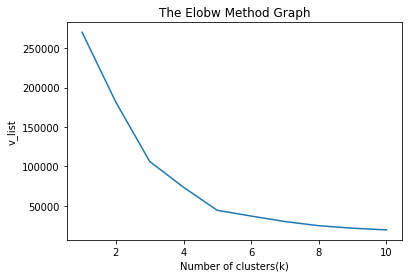

In [ ]:
#chercher le nombre optimal de clusters utilisant la methode d'elbow 

from sklearn.cluster import KMeans  
v_list= []  #Initialiser la  liste pour les valeurs de la variance  
      
#Utiliser la boucle pour les 10 itérations.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    v_list.append(kmeans.inertia_)  
mtp.plot(range(1, 11), v_list)  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('v_list')  
mtp.show()  

Comme nous pouvons le voir dans le code ci-dessus, nous avons utilisé la classe KMeans de sklearn. bibliothèque de clusters pour former les clusters.

Ensuite, nous avons créé la variable v_list pour initialiser une liste vide, qui est utilisée pour contenir la valeur de la variance calculée pour différentes valeurs de k allant de 1 à 10.

Après cela, nous avons initialisé la boucle for pour l’itération sur une valeur différente de k allant de 1 à 10; puisque pour la boucle en Python, excluez la limite sortante, il est donc pris comme 11 pour inclure la 10ème valeur.

La partie reste du code est similaire à celle que nous avons faite dans les rubriques précédentes, car nous avons ajusté le modèle sur une matrice de features, puis tracé le graphique entre le nombre de clusters et la variance.

D’après le graphique ci-dessus, nous pouvons voir que le point de coude est à 5. Donc, le nombre de clusters ici sera de 5.

In [ ]:
v_list

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30259.65720728547,
 25011.839349156588,
 21850.165282585636,
 19672.072849014323]

Étape 3 : Apprentissage de l’algorithme K-means sur l’ensemble de données d’apprentissage

Comme nous avons le nombre de clusters, nous pouvons maintenant entraîner le modèle sur le jeu de données.

Pour entraîner le modèle, nous utiliserons les deux mêmes lignes de code que celles que nous avons utilisées dans la section ci-dessus, mais ici au lieu d’utiliser i, nous utiliserons 5, car nous savons qu’il y a 5 clusters qui doivent être formés. Le code est donné ci-dessous:

In [ ]:
#algorithme k-menas sur le  dataset  
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)  

La première ligne est la même que ci-dessus pour créer l’objet de la classe KMeans.

Dans la deuxième ligne de code, nous avons créé la variable dépendante y_predict pour entraîner le modèle.

In [ ]:
y_predict

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

Étape 4 : Visualisation des clusters

La dernière étape consiste à visualiser les clusters. Comme nous avons 5 clusters pour notre modèle, nous allons donc visualiser chaque cluster un par un.
Pour visualiser les clusters, utilisez le nuage de points à l’aide de la fonction mtp.scatter() de matplotlib.

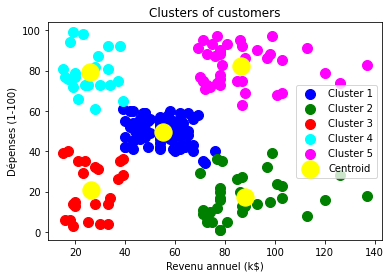

In [ ]:
#visualiser les clusters  
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
mtp.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
mtp.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('Clusters of customers')  
mtp.xlabel('Revenu annuel (k$)')  
mtp.ylabel('Dépenses (1-100)')  
mtp.legend()  
mtp.show()  

Dans les lignes de code ci-dessus, nous avons écrit du code pour chaque cluster, allant de 1 à 5. La première coordonnée du mtp.scatter, c’est-à-dire x[y_predict == 0, 0] contenant la valeur x pour l’affichage des valeurs de la matrice des entités, et le y_predict est compris entre 0 et 1.

L’image de sortie montre clairement les cinq clusters différentes avec des couleurs différentes. Les clusters sont formés entre deux paramètres du jeu de données ; Revenu annuel du client et dépenses. Nous pouvons changer les couleurs et les étiquettes selon l’exigence ou le choix. Nous pouvons également observer certains points des modèles ci-dessus, qui sont donnés ci-dessous:

Cluster1 affiche les clients avec le salaire moyen et les dépenses moyennes afin que nous puissions catégoriser ces clients comme moyen
Cluster2 montre que le client a un revenu élevé mais de faibles dépenses, nous pouvons donc le classer comme prudent.
Le cluster 3 montre les faibles revenus et les faibles dépenses, de sorte qu’ils peuvent être classés comme raisonnables.
Cluster4 montre les clients à faible revenu avec des dépenses très élevées afin qu’ils puissent être classés comme négligents.
Cluster5 montre les clients ayant des revenus élevés et des dépenses élevées afin qu’ils puissent être classés comme cibles, et ces clients peuvent être les clients les plus rentables pour le propriétaire du centre commercial.
